# Mentorias 2022 - M17 - Grupo 1 - Entregable 1

**Integrantes:** Abdala A. - Acosta M. - Ramos M.

Consignas Entrega **24/05.**

Práctico de análisis y visualización,que consistirá en una conocer la estructura de las informaciones disponibles, analizar las diferentes tablas y familiarizarse con los datos georeferenciados. Específicamente realizaremos:

* Correlación entre variables/análisis de independencia. A través de este 
análisis se debe identificar el impacto de cada variable sobre la calidad de servicio.

* Análisis de outliers.

* Visualización de la calidad de servicio y el consumo de energía anual por grupo tarifario, circuito y por conjunto eléctrico

#Carga de Modulos e Ingesta de Datos

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import plotly.express as px
import missingno as msno

In [ ]:
#Files
url1 = 'https://raw.githubusercontent.com/concientizar/Diplomatura2022/main/file1604544922865.csv'
#!wget https://github.com/concientizar/Diplomatura2022/blob/main/file20201101_mes.zip

In [ ]:
#!unzip /content/file20201101_mes.zip

##Leemos los archivos CSV

In [ ]:
df_1 = pandas.read_csv(url1)

##Analisis del Df

Como actividad inicial vamos a identificar las columnas del df y el tipo de datos de cada una

In [ ]:
df_1.columns

Index(['Current_A', 'Current_B', 'Current_C', 'Current_N', 'Current_G',
       'Current_Avg', 'Current_UNB_A', 'Current_UNB_B', 'Current_UNB_C',
       'Voltage_A_B', 'Voltage_B_C', 'Voltage_C_A', 'Voltage_L_L_Avg',
       'Voltage_A_N', 'Voltage_B_N', 'Voltage_C_N', 'rsrv1', 'Voltage_L_N_Avg',
       'Voltage_UNB_A_B', 'Voltage_UNB_B_C', 'Voltage_UNB_C_A',
       'Voltage_UNB_L_L_Worst', 'Voltage_UNB_A_N', 'Voltage_UNB_B_N',
       'Voltage_UNB_C_N', 'Voltage_UNB_L_N_Worst', 'Current_UNB_Worst',
       'Active_Power_A', 'Active_Power_B', 'Active_Power_C',
       'Active_Power_Total', 'Reactive_Power_A', 'Reactive_Power_B',
       'Reactive_Power_C', 'Reactive_Power_Total', 'Apparent_Power_A',
       'Apparent_Power_B', 'Apparent_Power_C', 'Apparent_Power_Total',
       'Power_Factor_A', 'Power_Factor_B', 'Power_Factor_C',
       'Power_Factor_Total', 'Frequency', 'Temperature',
       'Active_Energy_LastDay', 'rsrv2', 'rsrv3', 'rsrv4',
       'Energy_Acum_Datetime', 'Active_Energy_Del

In [ ]:
df_1.dtypes

Current_A                    float64
Current_B                    float64
Current_C                    float64
Current_N                    float64
Current_G                      int64
                              ...   
Reactive_Energy_del_m_rec    float64
Apparent_Energy_Delivered    float64
Apparent_Energy_Received     float64
Apparent_Energy_del_p_rec      int64
createdAt                     object
Length: 62, dtype: object

Contamos el # de Columnas del df

In [ ]:
shape = df_1.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])

Number of columns : 62


Asignamos el formato de datetime a la Columna "CreatedAt"

In [ ]:
#df_1['createdAt'] = df_1['createdAt'].str.replace('T', ' ')
#df_1['createdAt'] = df_1['createdAt'].str.replace('Z', '')
df_1.index = pandas.to_datetime(df_1['createdAt'],infer_datetime_format=True)

Analizamos los 5 primeros y ultimos datos del df para comenzar a familiarizarnos con los datos del dataset

In [ ]:
pandas.set_option('display.max_columns', None)
df_1.head()

,Current_A,Current_B,Current_C,Current_N,Current_G,Current_Avg,Current_UNB_A,Current_UNB_B,Current_UNB_C,Voltage_A_B,Voltage_B_C,Voltage_C_A,Voltage_L_L_Avg,Voltage_A_N,Voltage_B_N,Voltage_C_N,rsrv1,Voltage_L_N_Avg,Voltage_UNB_A_B,Voltage_UNB_B_C,Voltage_UNB_C_A,Voltage_UNB_L_L_Worst,Voltage_UNB_A_N,Voltage_UNB_B_N,Voltage_UNB_C_N,Voltage_UNB_L_N_Worst,Current_UNB_Worst,Active_Power_A,Active_Power_B,Active_Power_C,Active_Power_Total,Reactive_Power_A,Reactive_Power_B,Reactive_Power_C,Reactive_Power_Total,Apparent_Power_A,Apparent_Power_B,Apparent_Power_C,Apparent_Power_Total,Power_Factor_A,Power_Factor_B,Power_Factor_C,Power_Factor_Total,Frequency,Temperature,Active_Energy_LastDay,rsrv2,rsrv3,rsrv4,Energy_Acum_Datetime,Active_Energy_Delivered,Active_Energy_Received,Active_Energy_del_p_rec,Active_Energy_del_m_rec,Reactive_Energy_Delivered,Reactive_Energy_Received,Reactive_Energy_del_p_rec,Reactive_Energy_del_m_rec,Apparent_Energy_Delivered,Apparent_Energy_Received,Apparent_Energy_del_p_rec,createdAt
createdAt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-04 00:00:10.274000+00:00,9.69,2.28,4.36,6.28,13,2,1,2,5,380,391,383,380,234.22,233.63,233.65,0,233.83,30,23,26,12,12,15,15,0,0,2.09,0.4,0.99,3.48,0.89,-0.33,-0.26,0.31,2.27,0.52,1.02,3.49,0.92,1.23,1.03,1.0,49.98,44.93,4.2,0,0,0,0,96695.53,362.77,97058.30,96332.75,74779.39,154.7,74934.09,74624.69,124361.95,906.87,4,2020-11-04T00:00:10.274Z
2020-11-04 00:00:22.790000+00:00,9.69,2.28,4.36,6.28,13,2,1,2,5,380,391,383,380,234.20,233.62,233.66,0,233.83,30,23,26,12,12,15,15,0,0,2.09,0.4,0.99,3.47,0.89,-0.33,-0.25,0.31,2.27,0.52,1.02,3.49,0.92,1.23,1.03,1.0,49.98,45.54,4.2,0,0,0,0,96695.54,362.77,97058.31,96332.77,74779.39,154.7,74934.09,74624.69,124361.96,906.87,4,2020-11-04T00:00:22.790Z
2020-11-04 00:00:33.155000+00:00,9.69,2.22,4.36,6.27,13,2,1,2,5,380,391,383,380,234.28,233.69,233.71,0,233.89,30,23,26,12,12,15,15,0,0,2.09,0.4,0.99,3.47,0.89,-0.33,-0.25,0.31,2.27,0.52,1.02,3.49,0.92,1.23,1.03,1.0,49.99,45.54,4.2,0,0,0,0,96695.55,362.77,97058.32,96332.77,74779.39,154.7,74934.09,74624.69,124361.97,906.87,4,2020-11-04T00:00:33.155Z
2020-11-04 00:00:45.541000+00:00,9.69,2.22,4.36,6.27,13,2,1,2,5,380,391,383,380,233.81,233.77,233.68,0,233.75,30,23,26,12,12,15,15,0,0,2.75,0.4,0.99,4.13,0.85,-0.33,-0.25,0.27,2.88,0.51,1.02,4.14,0.96,1.23,1.03,1.0,49.98,44.62,4.2,0,0,0,0,96695.55,362.77,97058.32,96332.77,74779.39,154.7,74934.09,74624.69,124361.98,906.87,4,2020-11-04T00:00:45.541Z
2020-11-04 00:00:57.867000+00:00,12.32,2.22,4.36,8.82,13,2,1,2,5,380,391,383,380,233.65,233.85,233.71,0,233.73,30,23,26,12,12,15,15,0,0,2.75,0.4,0.99,4.13,0.85,-0.33,-0.25,0.27,2.88,0.51,1.02,4.14,0.96,1.23,1.03,1.0,49.98,45.54,4.2,0,0,0,0,96695.58,362.77,97058.35,96332.80,74779.39,154.7,74934.09,74624.69,124361.99,906.87,4,2020-11-04T00:00:57.867Z


In [ ]:
df_1.tail()

,Current_A,Current_B,Current_C,Current_N,Current_G,Current_Avg,Current_UNB_A,Current_UNB_B,Current_UNB_C,Voltage_A_B,Voltage_B_C,Voltage_C_A,Voltage_L_L_Avg,Voltage_A_N,Voltage_B_N,Voltage_C_N,rsrv1,Voltage_L_N_Avg,Voltage_UNB_A_B,Voltage_UNB_B_C,Voltage_UNB_C_A,Voltage_UNB_L_L_Worst,Voltage_UNB_A_N,Voltage_UNB_B_N,Voltage_UNB_C_N,Voltage_UNB_L_N_Worst,Current_UNB_Worst,Active_Power_A,Active_Power_B,Active_Power_C,Active_Power_Total,Reactive_Power_A,Reactive_Power_B,Reactive_Power_C,Reactive_Power_Total,Apparent_Power_A,Apparent_Power_B,Apparent_Power_C,Apparent_Power_Total,Power_Factor_A,Power_Factor_B,Power_Factor_C,Power_Factor_Total,Frequency,Temperature,Active_Energy_LastDay,rsrv2,rsrv3,rsrv4,Energy_Acum_Datetime,Active_Energy_Delivered,Active_Energy_Received,Active_Energy_del_p_rec,Active_Energy_del_m_rec,Reactive_Energy_Delivered,Reactive_Energy_Received,Reactive_Energy_del_p_rec,Reactive_Energy_del_m_rec,Apparent_Energy_Delivered,Apparent_Energy_Received,Apparent_Energy_del_p_rec,createdAt
createdAt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-03 23:59:12.284000+00:00,9.69,2.21,4.36,6.27,13,2,1,2,5,380,391,383,380,233.95,233.40,233.42,0,233.59,30,23,26,12,12,15,15,0,0,2.09,0.4,0.99,3.47,0.89,-0.33,-0.25,0.30,2.27,0.52,1.02,3.48,0.92,1.23,1.03,1.0,49.97,45.54,4.2,0,0,0,0,96695.47,362.77,97058.25,96332.70,74779.38,154.7,74934.09,74624.69,124361.89,906.87,4,2020-11-03T23:59:12.284Z
2020-11-03 23:59:24.781000+00:00,9.69,2.22,4.36,6.27,13,2,1,2,5,380,391,383,380,233.98,233.44,233.45,0,233.62,30,23,26,12,12,15,15,0,0,2.09,0.4,0.99,3.47,0.89,-0.33,-0.25,0.30,2.27,0.52,1.02,3.48,0.92,1.23,1.03,1.0,49.98,45.24,4.2,0,0,0,0,96695.48,362.77,97058.26,96332.71,74779.39,154.7,74934.09,74624.69,124361.91,906.87,4,2020-11-03T23:59:24.781Z
2020-11-03 23:59:35.187000+00:00,9.69,2.22,4.36,6.27,13,2,1,2,5,380,391,383,380,234.16,233.61,233.59,0,233.78,30,23,26,12,12,15,15,0,0,2.09,0.4,0.99,3.47,0.89,-0.33,-0.25,0.31,2.27,0.52,1.02,3.49,0.92,1.23,1.03,1.0,49.98,45.54,4.2,0,0,0,0,96695.49,362.77,97058.27,96332.72,74779.39,154.7,74934.09,74624.69,124361.91,906.87,4,2020-11-03T23:59:35.187Z
2020-11-03 23:59:47.510000+00:00,9.70,2.22,4.36,6.28,13,2,1,2,5,380,391,383,380,234.16,233.61,233.62,0,233.80,30,23,26,12,12,15,15,0,0,2.09,0.4,0.99,3.47,0.89,-0.33,-0.25,0.31,2.27,0.52,1.02,3.49,0.92,1.23,1.03,1.0,49.98,45.24,4.2,0,0,0,0,96695.51,362.77,97058.28,96332.73,74779.39,154.7,74934.09,74624.69,124361.92,906.87,4,2020-11-03T23:59:47.510Z
2020-11-03 23:59:59.863000+00:00,9.69,2.22,4.36,6.27,13,2,1,2,5,380,391,383,380,234.16,233.61,233.62,0,233.80,30,23,26,12,12,15,15,0,0,2.09,0.4,0.99,3.47,0.89,-0.33,-0.26,0.31,2.27,0.52,1.02,3.49,0.92,1.23,1.03,1.0,49.98,45.54,4.2,0,0,0,0,96695.52,362.77,97058.29,96332.74,74779.39,154.7,74934.09,74624.69,124361.94,906.87,4,2020-11-03T23:59:59.863Z


Realizamos un vistazo a las columnas de Corriente Y Potencias por Fase

In [ ]:
df_1[['Current_A','Current_B','Current_C','Current_N','Current_G','Active_Power_A','Active_Power_B','Active_Power_C','Active_Power_Total']].describe()

,Current_A,Current_B,Current_C,Current_N,Current_G,Active_Power_A,Active_Power_B,Active_Power_C,Active_Power_Total
count,7119.000000,7119.000000,7119.000000,7119.000000,7119.0,7119.000000,7119.000000,7119.000000,7119.000000
mean,42.347331,31.327915,31.392374,13.458720,13.0,7.300822,4.971170,5.108979,17.380782
std,52.090659,47.568211,44.451956,10.603346,0.0,8.167233,7.472544,6.835872,22.418709
min,4.890000,2.120000,1.210000,2.080000,13.0,1.040000,0.380000,0.250000,1.780000
25%,9.310000,2.210000,4.370000,5.690000,13.0,1.980000,0.400000,0.980000,3.460000
50%,12.300000,2.260000,5.240000,8.540000,13.0,2.720000,0.400000,1.200000,4.260000
75%,93.700000,79.520000,75.490000,21.655000,13.0,14.760000,12.020000,10.570000,38.010000
max,220.980000,182.290000,178.740000,54.810000,13.0,34.590000,30.200000,29.280000,94.070000


Las variables **Current_G y Current AVG** poseen valores constantes que no serian significativos para nuestro análisis. Un estudio más detallado del comportamiento de este datapoint es necesario para ver si es completamente descartado.

###Detección las variables con valor cero del dataset

1.   Elemento de lista

      Verificamos la cantidad de valores cero en cada una de las columnas

In [ ]:
#Columnas con valores 0
cols = df_1[df_1 == 0].count(axis=0)
cols[cols > 0]

rsrv1                    7119
Voltage_UNB_L_N_Worst    7119
Current_UNB_Worst        7119
Reactive_Power_Total       24
rsrv2                    7119
rsrv3                    7119
rsrv4                    7119
Energy_Acum_Datetime     7119
dtype: int64


###Reconocimiento de datos faltantes




In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7119 entries, 2020-11-04 00:00:10.274000+00:00 to 2020-11-03 23:59:59.863000+00:00
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current_A                  7119 non-null   float64
 1   Current_B                  7119 non-null   float64
 2   Current_C                  7119 non-null   float64
 3   Current_N                  7119 non-null   float64
 4   Current_G                  7119 non-null   int64  
 5   Current_Avg                7119 non-null   int64  
 6   Current_UNB_A              7119 non-null   int64  
 7   Current_UNB_B              7119 non-null   int64  
 8   Current_UNB_C              7119 non-null   int64  
 9   Voltage_A_B                7119 non-null   int64  
 10  Voltage_B_C                7119 non-null   int64  
 11  Voltage_C_A                7119 non-null   int64  
 12  Voltage_L_L_Avg            7119 non-null  

In [ ]:
missing_values_count = df_1.isna().sum()
missing_values_count

Current_A                    0
Current_B                    0
Current_C                    0
Current_N                    0
Current_G                    0
                            ..
Reactive_Energy_del_m_rec    0
Apparent_Energy_Delivered    0
Apparent_Energy_Received     0
Apparent_Energy_del_p_rec    0
createdAt                    0
Length: 62, dtype: int64

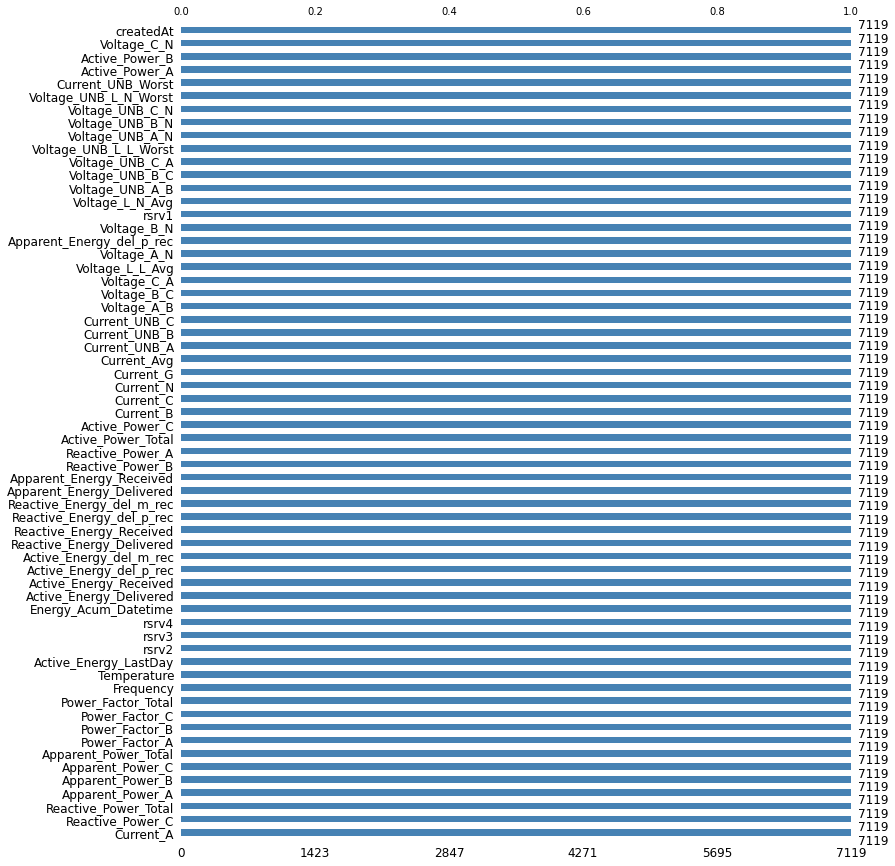

In [ ]:
msno.bar(df_1,figsize=(12, 15), sort="ascending",fontsize=12, color='steelblue')

### GROUP BY

In [ ]:
# Hour - mean
df_1_groupby_hour = df_1.groupby(pandas.Grouper(freq='H')).mean()
df_1_groupby_hour.head()

,Current_A,Current_B,Current_C,Current_N,Current_G,Current_Avg,Current_UNB_A,Current_UNB_B,Current_UNB_C,Voltage_A_B,Voltage_B_C,Voltage_C_A,Voltage_L_L_Avg,Voltage_A_N,Voltage_B_N,Voltage_C_N,rsrv1,Voltage_L_N_Avg,Voltage_UNB_A_B,Voltage_UNB_B_C,Voltage_UNB_C_A,Voltage_UNB_L_L_Worst,Voltage_UNB_A_N,Voltage_UNB_B_N,Voltage_UNB_C_N,Voltage_UNB_L_N_Worst,Current_UNB_Worst,Active_Power_A,Active_Power_B,Active_Power_C,Active_Power_Total,Reactive_Power_A,Reactive_Power_B,Reactive_Power_C,Reactive_Power_Total,Apparent_Power_A,Apparent_Power_B,Apparent_Power_C,Apparent_Power_Total,Power_Factor_A,Power_Factor_B,Power_Factor_C,Power_Factor_Total,Frequency,Temperature,Active_Energy_LastDay,rsrv2,rsrv3,rsrv4,Energy_Acum_Datetime,Active_Energy_Delivered,Active_Energy_Received,Active_Energy_del_p_rec,Active_Energy_del_m_rec,Reactive_Energy_Delivered,Reactive_Energy_Received,Reactive_Energy_del_p_rec,Reactive_Energy_del_m_rec,Apparent_Energy_Delivered,Apparent_Energy_Received,Apparent_Energy_del_p_rec
createdAt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-03 20:00:00+00:00,8.794444,2.354444,4.383333,5.342963,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.212593,234.495556,234.020741,0.0,234.576296,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.943704,0.426667,0.990000,3.365926,0.710741,-0.106667,-0.260000,0.347037,2.071481,0.553333,1.029630,3.399630,0.940000,1.093333,1.030000,0.990000,50.076667,48.087407,4.080000,0.0,0.0,0.0,0.0,96683.215185,362.77,97045.990370,96320.440370,74778.474815,154.620000,74933.095926,74623.860741,124349.567037,906.87,4.0
2020-11-03 21:00:00+00:00,11.107418,2.332222,4.839085,7.437516,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,234.295458,234.244575,233.496569,0.0,234.012059,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,2.517582,0.422222,1.093627,4.034902,0.693235,-0.164118,-0.254510,0.272712,2.617124,0.548366,1.126993,4.062778,0.959608,1.130033,1.026373,0.994085,50.026536,47.607778,3.967222,0.0,0.0,0.0,0.0,96685.347190,362.77,97048.120948,96322.573137,74778.572190,154.638954,74933.211699,74623.933170,124351.705915,906.87,4.0
2020-11-03 22:00:00+00:00,11.804615,2.317885,4.842115,8.090288,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,233.961891,234.041154,233.497500,0.0,233.833654,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,2.621186,0.414968,1.091987,4.127468,0.817051,-0.227500,-0.257500,0.330673,2.751667,0.541795,1.122821,4.156090,0.951346,1.167853,1.026859,0.994679,50.002308,46.709071,3.990962,0.0,0.0,0.0,0.0,96689.347019,362.77,97052.121603,96326.573590,74778.916474,154.663397,74933.579647,74624.254647,124355.734712,906.87,4.0
2020-11-03 23:00:00+00:00,11.171125,2.279132,4.784180,7.662476,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,234.025788,234.013569,233.566559,0.0,233.868842,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,2.519132,0.413248,1.085048,4.016334,0.703248,-0.219196,-0.258778,0.227074,2.622797,0.531640,1.114662,4.032476,0.958714,1.162347,1.027363,0.997781,50.010032,45.916045,4.174598,0.0,0.0,0.0,0.0,96693.536141,362.77,97056.310450,96330.761994,74779.284534,154.692219,74933.974695,74624.590514,124359.953055,906.87,4.0
2020-11-04 00:00:00+00:00,11.447404,2.296795,4.530801,7.684872,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,230.481955,230.466410,230.374712,0.0,230.441090,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,2.552051,0.418109,0.977660,3.949551,0.653429,-0.133654,-0.337340,0.180609,2.640994,0.530032,1.041218,3.975160,0.966282,1.106731,1.063526,0.994712,50.010865,45.052692,3.773429,0.0,0.0,0.0,0.0,96697.409071,362.77,97060.182692,96334.635128,74779.567051,154.750000,74934.318333,74624.815769,124363.848301,906.87,4.0


In [ ]:
# Minute - mean
df_1_groupby_minute_mean = df_1.groupby(pandas.Grouper(freq='MIN')).mean()
df_1_groupby_minute_mean.head()

,Current_A,Current_B,Current_C,Current_N,Current_G,Current_Avg,Current_UNB_A,Current_UNB_B,Current_UNB_C,Voltage_A_B,Voltage_B_C,Voltage_C_A,Voltage_L_L_Avg,Voltage_A_N,Voltage_B_N,Voltage_C_N,rsrv1,Voltage_L_N_Avg,Voltage_UNB_A_B,Voltage_UNB_B_C,Voltage_UNB_C_A,Voltage_UNB_L_L_Worst,Voltage_UNB_A_N,Voltage_UNB_B_N,Voltage_UNB_C_N,Voltage_UNB_L_N_Worst,Current_UNB_Worst,Active_Power_A,Active_Power_B,Active_Power_C,Active_Power_Total,Reactive_Power_A,Reactive_Power_B,Reactive_Power_C,Reactive_Power_Total,Apparent_Power_A,Apparent_Power_B,Apparent_Power_C,Apparent_Power_Total,Power_Factor_A,Power_Factor_B,Power_Factor_C,Power_Factor_Total,Frequency,Temperature,Active_Energy_LastDay,rsrv2,rsrv3,rsrv4,Energy_Acum_Datetime,Active_Energy_Delivered,Active_Energy_Received,Active_Energy_del_p_rec,Active_Energy_del_m_rec,Reactive_Energy_Delivered,Reactive_Energy_Received,Reactive_Energy_del_p_rec,Reactive_Energy_del_m_rec,Apparent_Energy_Delivered,Apparent_Energy_Received,Apparent_Energy_del_p_rec
createdAt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-03 20:54:00+00:00,8.860000,2.570,4.380000,5.060000,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.210000,234.440,233.960000,0.0,234.540000,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.960,0.480,0.99,3.440,0.710,0.36,-0.26,0.810,2.080000,0.600,1.030,3.530,0.94,0.800,1.03,0.970,50.070000,48.610,4.08,0.0,0.0,0.0,0.0,96683.050000,362.77,97045.820,96320.270000,74778.450,154.62,74933.080,74623.840,124349.410000,906.87,4.0
2020-11-03 20:55:00+00:00,8.808000,2.570,4.382000,5.018000,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.278000,234.484,234.028000,0.0,234.598000,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.948,0.480,0.99,3.426,0.710,0.36,-0.26,0.812,2.074000,0.600,1.030,3.522,0.94,0.800,1.03,0.970,50.086000,48.302,4.08,0.0,0.0,0.0,0.0,96683.102000,362.77,97045.886,96320.330000,74778.460,154.62,74933.086,74623.844,124349.454000,906.87,4.0
2020-11-03 20:56:00+00:00,8.784000,2.442,4.380000,5.200000,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.290000,234.486,234.030000,0.0,234.600000,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.944,0.448,0.99,3.386,0.714,0.08,-0.26,0.538,2.072000,0.572,1.028,3.446,0.94,0.976,1.03,0.982,50.086000,47.996,4.08,0.0,0.0,0.0,0.0,96683.162000,362.77,97045.938,96320.388000,74778.478,154.62,74933.096,74623.860,124349.516000,906.87,4.0
2020-11-03 20:57:00+00:00,8.796000,2.244,4.380000,5.512000,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.276000,234.674,234.118000,0.0,234.690000,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.948,0.400,0.99,3.346,0.710,-0.34,-0.26,0.112,2.078000,0.530,1.030,3.348,0.94,1.240,1.03,1.000,50.090000,47.874,4.08,0.0,0.0,0.0,0.0,96683.220000,362.77,97045.992,96320.442000,74778.480,154.62,74933.100,74623.862,124349.568000,906.87,4.0
2020-11-03 20:58:00+00:00,8.821667,2.250,4.386667,5.538333,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.163333,234.510,234.041667,0.0,234.571667,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.945,0.400,0.99,3.340,0.710,-0.34,-0.26,0.110,2.071667,0.530,1.030,3.345,0.94,1.240,1.03,1.000,50.081667,48.100,4.08,0.0,0.0,0.0,0.0,96683.276667,362.77,97046.050,96320.498333,74778.480,154.62,74933.100,74623.870,124349.628333,906.87,4.0


In [ ]:
# Minute - MAX
df_1_groupby_minute_max = df_1.groupby(pandas.Grouper(freq='MIN')).max()
df_1_groupby_minute_max.head()

,Current_A,Current_B,Current_C,Current_N,Current_G,Current_Avg,Current_UNB_A,Current_UNB_B,Current_UNB_C,Voltage_A_B,Voltage_B_C,Voltage_C_A,Voltage_L_L_Avg,Voltage_A_N,Voltage_B_N,Voltage_C_N,rsrv1,Voltage_L_N_Avg,Voltage_UNB_A_B,Voltage_UNB_B_C,Voltage_UNB_C_A,Voltage_UNB_L_L_Worst,Voltage_UNB_A_N,Voltage_UNB_B_N,Voltage_UNB_C_N,Voltage_UNB_L_N_Worst,Current_UNB_Worst,Active_Power_A,Active_Power_B,Active_Power_C,Active_Power_Total,Reactive_Power_A,Reactive_Power_B,Reactive_Power_C,Reactive_Power_Total,Apparent_Power_A,Apparent_Power_B,Apparent_Power_C,Apparent_Power_Total,Power_Factor_A,Power_Factor_B,Power_Factor_C,Power_Factor_Total,Frequency,Temperature,Active_Energy_LastDay,rsrv2,rsrv3,rsrv4,Energy_Acum_Datetime,Active_Energy_Delivered,Active_Energy_Received,Active_Energy_del_p_rec,Active_Energy_del_m_rec,Reactive_Energy_Delivered,Reactive_Energy_Received,Reactive_Energy_del_p_rec,Reactive_Energy_del_m_rec,Apparent_Energy_Delivered,Apparent_Energy_Received,Apparent_Energy_del_p_rec,createdAt
createdAt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-03 20:54:00+00:00,8.86,2.57,4.38,5.06,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.21,234.44,233.96,0.0,234.54,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.96,0.48,0.99,3.44,0.71,0.36,-0.26,0.81,2.08,0.60,1.03,3.53,0.94,0.80,1.03,0.97,50.07,48.61,4.08,0.0,0.0,0.0,0.0,96683.05,362.77,97045.82,96320.27,74778.45,154.62,74933.08,74623.84,124349.41,906.87,4.0,2020-11-03T20:54:49.810Z
2020-11-03 20:55:00+00:00,8.86,2.57,4.39,5.06,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.32,234.51,234.06,0.0,234.63,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.96,0.48,0.99,3.44,0.71,0.36,-0.26,0.82,2.08,0.60,1.03,3.53,0.94,0.80,1.03,0.97,50.09,48.61,4.08,0.0,0.0,0.0,0.0,96683.12,362.77,97045.91,96320.36,74778.47,154.62,74933.09,74623.85,124349.48,906.87,4.0,2020-11-03T20:55:51.913Z
2020-11-03 20:56:00+00:00,8.83,2.57,4.38,5.54,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.32,234.60,234.07,0.0,234.64,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.95,0.48,0.99,3.42,0.72,0.36,-0.26,0.82,2.08,0.60,1.03,3.52,0.94,1.24,1.03,1.00,50.10,48.61,4.08,0.0,0.0,0.0,0.0,96683.19,362.77,97045.96,96320.41,74778.48,154.62,74933.10,74623.86,124349.54,906.87,4.0,2020-11-03T20:56:49.742Z
2020-11-03 20:57:00+00:00,8.84,2.25,4.38,5.55,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.31,234.74,234.17,0.0,234.74,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.95,0.40,0.99,3.35,0.71,-0.34,-0.26,0.12,2.08,0.53,1.03,3.35,0.94,1.24,1.03,1.00,50.10,48.30,4.08,0.0,0.0,0.0,0.0,96683.24,362.77,97046.02,96320.46,74778.48,154.62,74933.10,74623.87,124349.59,906.87,4.0,2020-11-03T20:57:47.695Z
2020-11-03 20:58:00+00:00,8.84,2.26,4.40,5.56,13.0,2.0,1.0,2.0,5.0,380.0,391.0,383.0,380.0,235.25,234.67,234.22,0.0,234.71,30.0,23.0,26.0,12.0,12.0,15.0,15.0,0.0,0.0,1.95,0.40,0.99,3.35,0.71,-0.34,-0.26,0.11,2.08,0.53,1.03,3.35,0.94,1.24,1.03,1.00,50.09,48.30,4.08,0.0,0.0,0.0,0.0,96683.30,362.77,97046.08,96320.53,74778.48,154.62,74933.10,74623.87,124349.66,906.87,4.0,2020-11-03T20:58:57.834Z


###Cantidad de registros por hora

Analizamos las cantidad de Registros por Hora para identificar posibles perdidas de comunicacion con el sensor que puedan afectar nuestro análisis

In [ ]:
#Contar registros por cada hora
df_1['Hour'] = df_1.index.hour
# shift column 'Hour' to first position
first_column = df_1.pop('Hour')
  
# insert column using insert(position,column_name,
# first_column) function
df_1.insert(0, 'Hour', first_column)

hour_counts = df_1['Hour'].value_counts().sort_index()
hour_counts

0     312
1     310
2     312
3     312
4     308
5     312
6     309
7     298
8      19
9     269
10    191
11    100
12    140
13    303
14    307
15    207
16    103
17    227
18    313
19    312
20    337
21    617
22    606
23    595
Name: Hour, dtype: int64

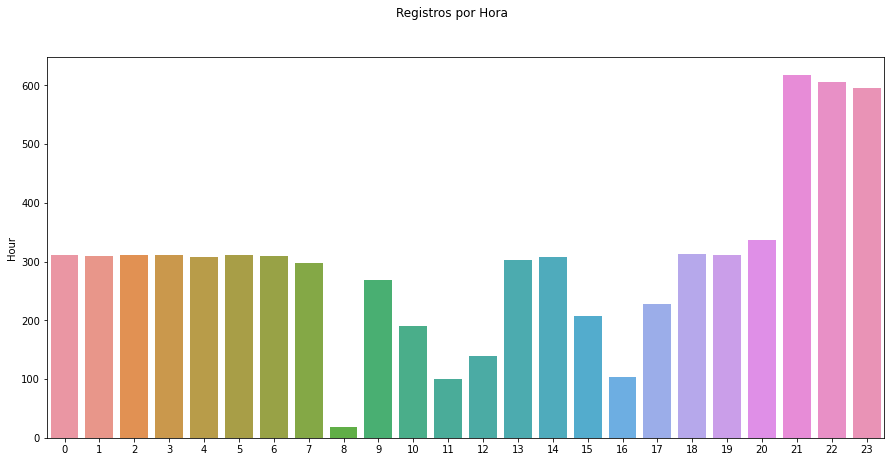

In [ ]:
fig = plt.figure(figsize=(15,7)).suptitle("Registros por Hora")
seaborn.barplot( x=hour_counts.index, y=hour_counts)

Observamos que a las 8 de la manana se podruce un signaficativo descenso registros. 
Otro dato relevante es que durante la noche desde 21 a 23 se generan más registros que de 0 a 7. Hasta este momento no podemos determionar el motivo de este decenso.

**Cómo afecta a nuestro dataset la basa de registros en horarios críticos como son las 8 , 11, 12 y 16 en los que la planta se ecnuentra en plena producción?** 

# Análisis por puntos de Factor de Potencia Total

La medición del consumo de energía eléctrica implica la medición de las potencias activa 
(kW), la potencia reactiva (kVAr) y la suma vectorial de estas dos denominada potencia 
aparente (kVA). La potencia Activa es la que se convierte en trabajo útil mientras que la 
potencia reactiva es la que se requiere para el funcionamiento de ciertos artefactos como 
motores, bobinas, etc.

La potencia reactiva implica un costo para las empresas distribuidoras, transportadoras de 
energía eléctrica por lo que estas penalizan su uso por sobre un factor adimensional denominado Cosφ. 
Debido a que los diferentes artefactos presentes en una instalación industrial necesitan la potencia reactiva para su funcionamiento, es necesario instalar bancos de capacitores (automáticos o manuales) que compensen el cosφ para mantenerlo dentro de los limites establecidos por la distribuidora electrica.  

En Córdoba EPEC realiza mediciones de la Energia suministrada y penaliza a los consumidores industriales con Cosφ menos a 0.95. Por este motivo el analisis de estos puntos cobra signitficattiva importancia. 

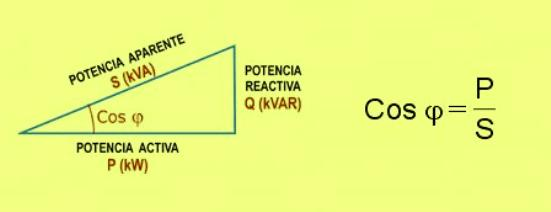

La formulación para las potencias es la siguiente:

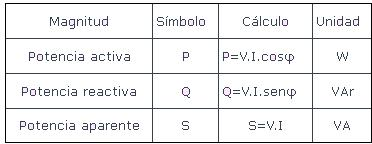

Text(0.5, 0.98, 'Potencia Activa Total')

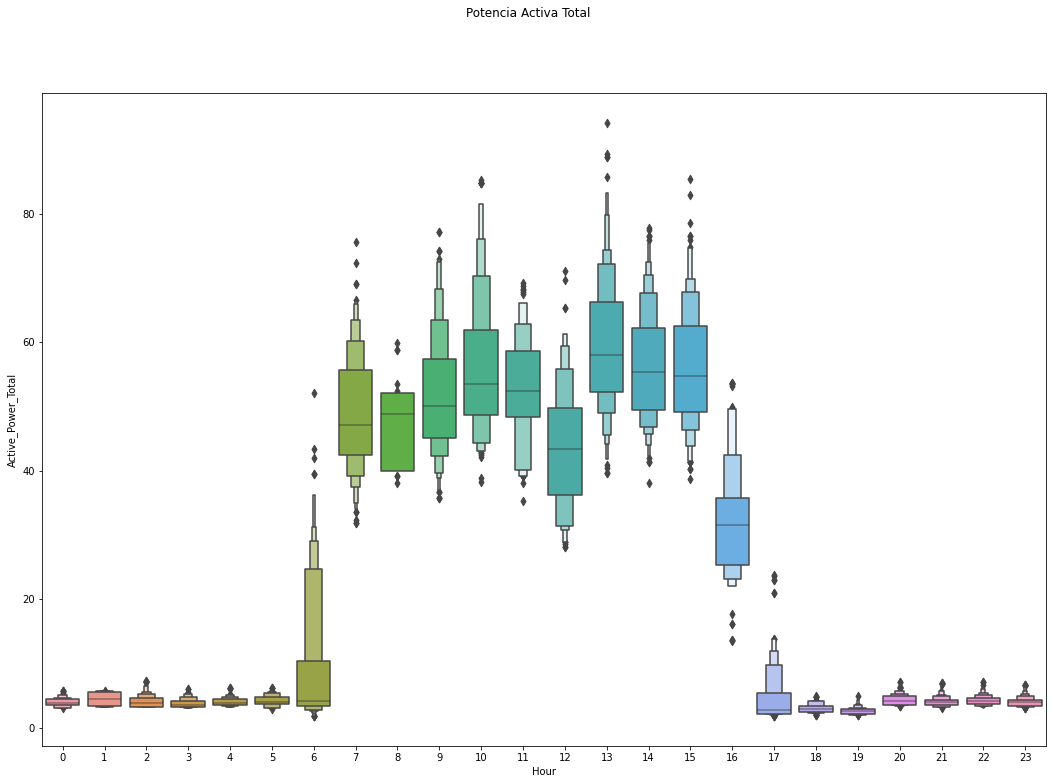

In [ ]:
fig = plt.figure(figsize=(18, 12))
seaborn.boxenplot(data = df_1, x = 'Hour', y = 'Active_Power_Total')
fig.suptitle('Potencia Activa Total')

In [ ]:
df_1['Power_Factor_Total'].max(), df_1['Power_Factor_Total'].min()

(1.01, 0.52)

Text(0.5, 0.98, 'Factor de Potencia Total - CosΦ')

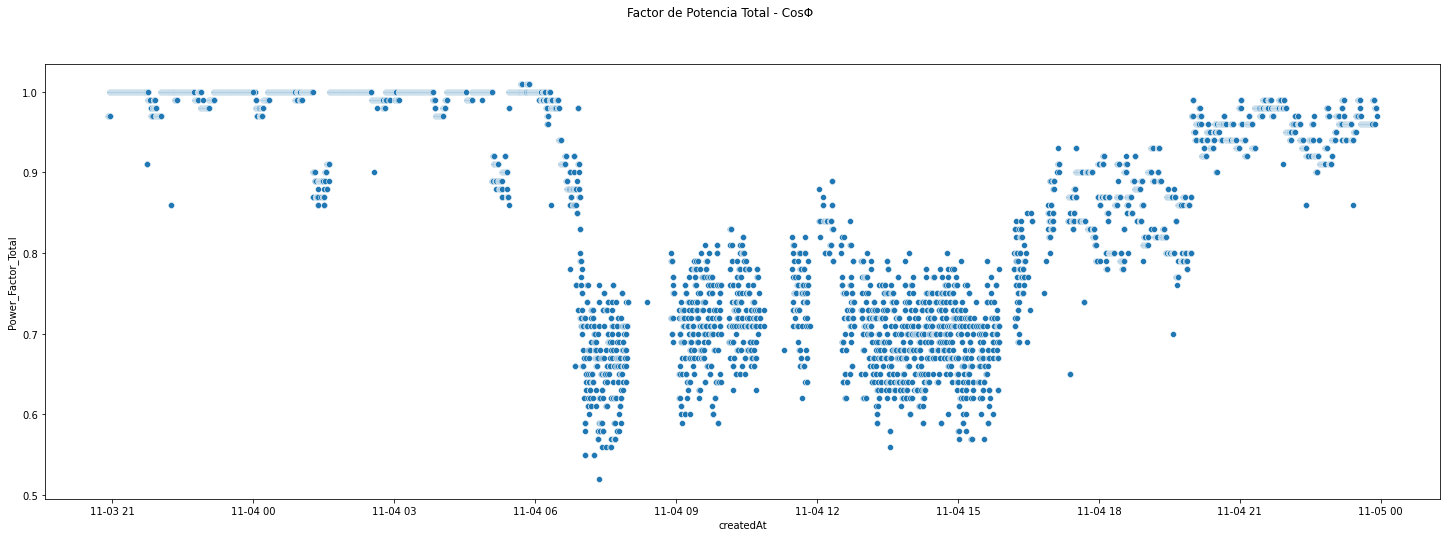

In [ ]:
fig = plt.figure(figsize=(25,8))
seaborn.scatterplot(data=df_1, y='Power_Factor_Total', x=df_1.index)
fig.suptitle('Factor de Potencia Total - CosΦ')

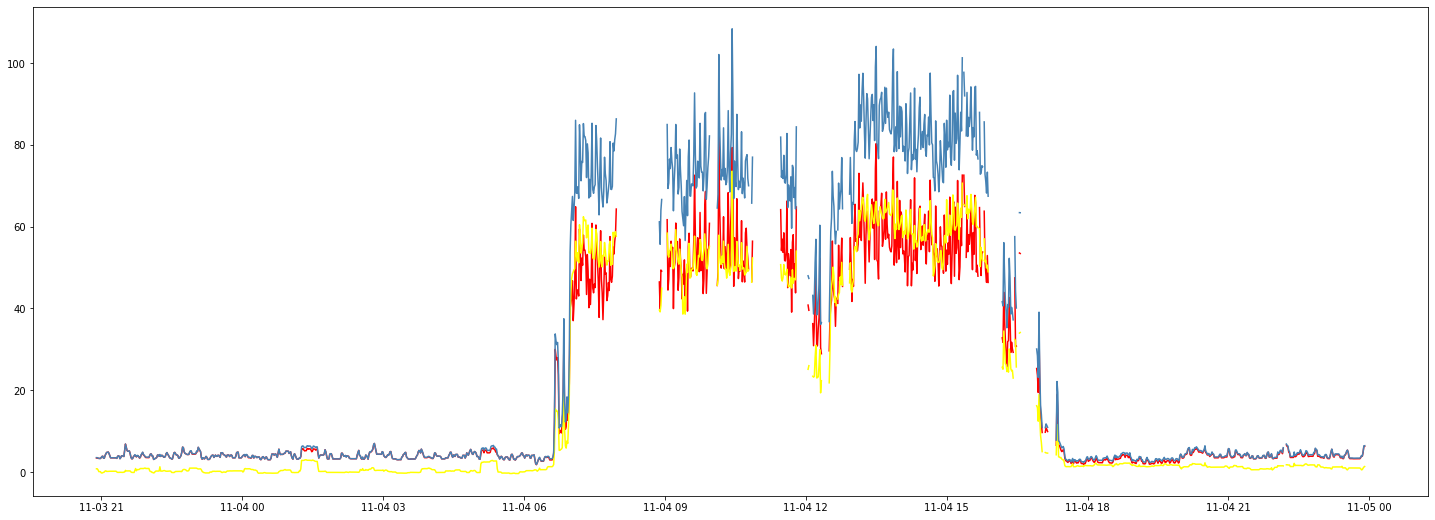

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 9))
ax1.plot( df_1_groupby_minute_mean["Active_Power_Total"], color="red")
ax1.plot( df_1_groupby_minute_mean["Reactive_Power_Total"],  color="yellow")
ax1.plot(df_1_groupby_minute_mean["Apparent_Power_Total"], color="steelblue")
#ax1.plot(df_1_groupby_minute_mean["Power_Factor_Total"], "black")
plt.show()

Vistazo en detalle a la Columna de Factor de Potencia Total y por Fases

In [ ]:
df_1[['Power_Factor_Total','Power_Factor_A','Power_Factor_B','Power_Factor_C']].describe()

,Power_Factor_Total,Power_Factor_A,Power_Factor_B,Power_Factor_C
count,7119.000000,7119.000000,7119.000000,7119.000000
mean,0.886459,0.876081,0.901313,0.911004
std,0.126384,0.107820,0.231169,0.153331
min,0.520000,0.560000,0.510000,0.480000
25%,0.780000,0.770000,0.750000,0.770000
50%,0.940000,0.930000,0.770000,0.980000
75%,1.000000,0.960000,1.220000,1.030000
max,1.010000,0.990000,1.270000,1.090000


Podemos Identificar valores por sobre 1 en la columnas Total - B - C. Debemos definir si estos valores son tratados como Outliers

In [ ]:
"""
df_1.index.name = None
# df_2.index.name = None
merged_df = df_1.merge(df_2.rename(columns={
  'Power_Factor':'Power_Factor_Total',
  #'Voltage': ,
  #'Current' : , 
  'Active_Power': 'Active_Power_Total',
  'Apparent_Power': 'Apparent_Power_Total',
  'Reactive_Power':'Reactive_Power_Total',
  'Power_Factor': 'Power_Factor_Total',
  #'Phase_angle', 'Frequency', 'Fordward_Energy','Reverse_Energy', 'Abs_Energy', 'Ind_Energy','Cap_Energy', 'Abs_Reactive_Energy'
  
  }),how='outer')
merged_df.index = pandas.to_datetime(merged_df['createdAt'],infer_datetime_format=True)
merged_df.head()
"""

"\ndf_1.index.name = None\n# df_2.index.name = None\nmerged_df = df_1.merge(df_2.rename(columns={\n  'Power_Factor':'Power_Factor_Total',\n  #'Voltage': ,\n  #'Current' : , \n  'Active_Power': 'Active_Power_Total',\n  'Apparent_Power': 'Apparent_Power_Total',\n  'Reactive_Power':'Reactive_Power_Total',\n  'Power_Factor': 'Power_Factor_Total',\n  #'Phase_angle', 'Frequency', 'Fordward_Energy','Reverse_Energy', 'Abs_Energy', 'Ind_Energy','Cap_Energy', 'Abs_Reactive_Energy'\n  \n  }),how='outer')\nmerged_df.index = pandas.to_datetime(merged_df['createdAt'],infer_datetime_format=True)\nmerged_df.head()\n"

Para comprender mejor las posibles desviaciones debemos contrastar el factor de potencia de cada fase por separado

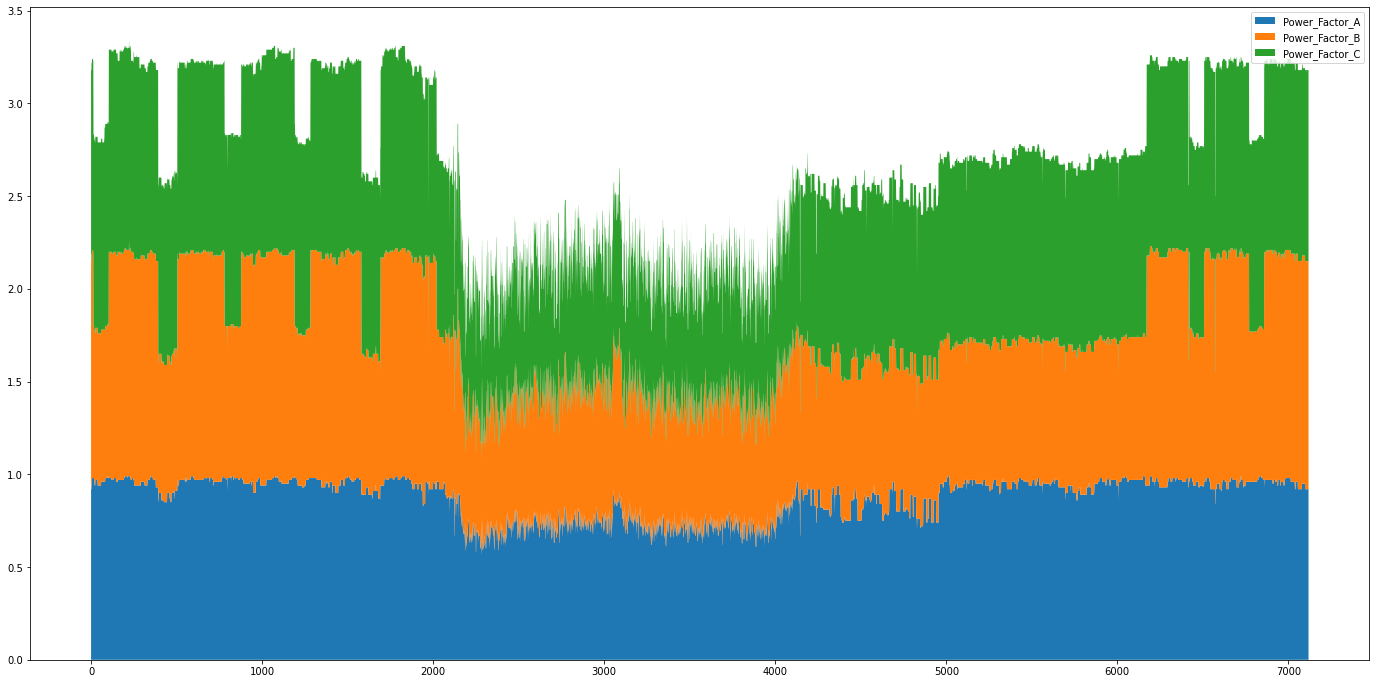

In [ ]:
#library
import numpy as np
import matplotlib.pyplot as plt
df_2 = pandas.read_csv(url1)
plt.figure(figsize=(24, 12))
# Create data
#x=range(1,200)
x=df_2.index
y1=df_2['Power_Factor_A']
y2=df_2['Power_Factor_B']
y3=df_2['Power_Factor_C']
# Basic stacked area chart.
plt.stackplot(x, y1, y2, y3,  labels=['Power_Factor_A','Power_Factor_B','Power_Factor_C'])
plt.legend(loc='upper right')


Del gráfico anterior podemos estimar que los factores de potencia por fase se encuentran desbalanceados, seguramente porque en la instalación existe un banco de capacitores general.
Los picos y valles fuera del horario laboral hacen suponer que poseen cargas inductivas (seguramente luminarias tipo LED) que generan estos cambios bruscos.

También se puede ver que sobre la fase C existe un gran ruido durante el horario de producción, probablemente por gran cantidad de fuentes tipo switching conectadas a esta fase.

# Análisis de Voltaje por Fases

Se graficara el voltaje en el tiempo de las tres fases para conocer como es su comportamiento en el tiempo

Text(0.5, 1.0, 'Voltage_C_N')

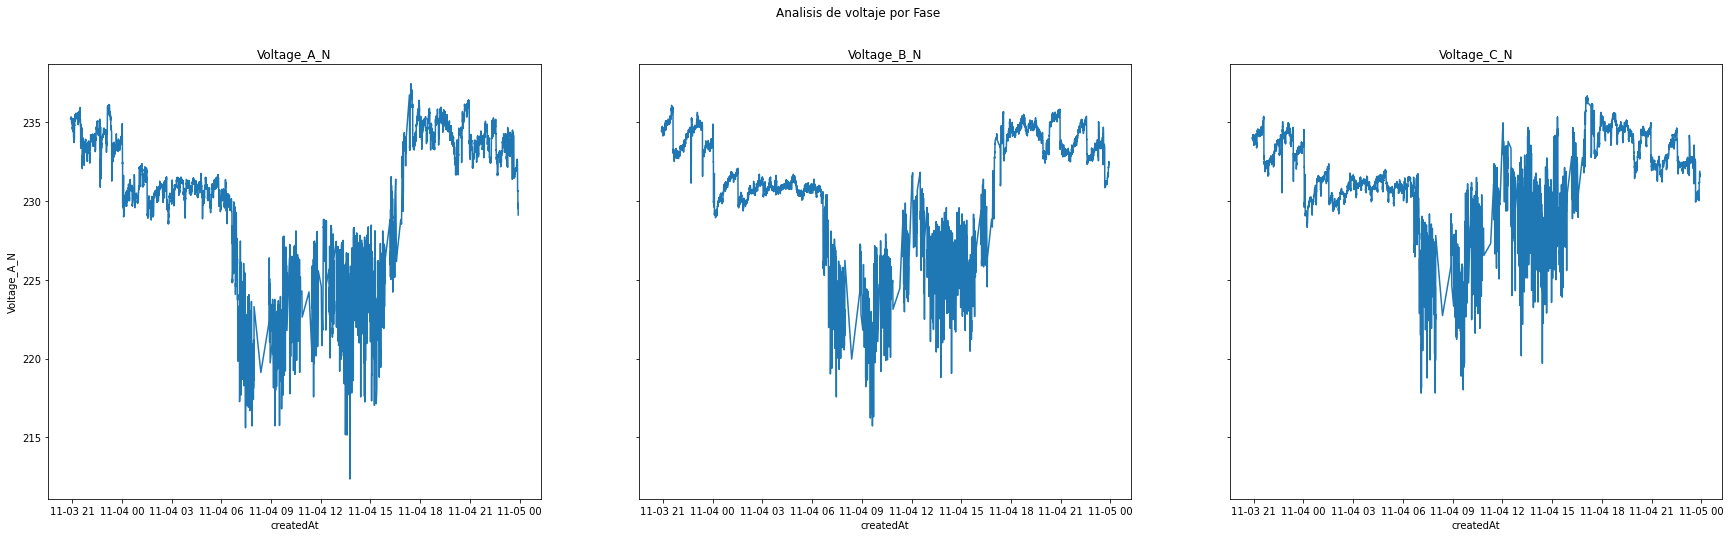

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,8), sharey=True)
fig.suptitle('Analisis de voltaje por Fase')

seaborn.lineplot(data=df_1,  ax=axes[0], x=df_1.index, y="Voltage_A_N")
axes[0].set_title('Voltage_A_N')

seaborn.lineplot(data=df_1,  ax=axes[1], x=df_1.index, y="Voltage_B_N")
axes[1].set_title('Voltage_B_N')

seaborn.lineplot(data=df_1,  ax=axes[2], x=df_1.index, y="Voltage_C_N")
axes[2].set_title('Voltage_C_N')


Se puede ver de esto que el voltaje no presenta una gran variabilidad y se puede considerar que se mantiene constante en el tiempo, por tanto la potencia y el factor dependencia seran dependientes de la variación de la corriente

# Análisis de Corriente por Fases

De manera de comenzar a determinar las posibles causas de los problemas del factor de Potencia, debemos realizar un analisis de los consumos por fases que nos permitan entender posibles desviaciones que esten afectando al cos phi general.

Basándonos en conceptos básicos de electricidad analizaremos las curvas de corrientes ya que son las que tienen mayor variabilidad. Por ahora podemos estimar el Voltaje constante aunque sabemos que no lo es 100%.

Text(0.5, 1.0, 'Current_C')

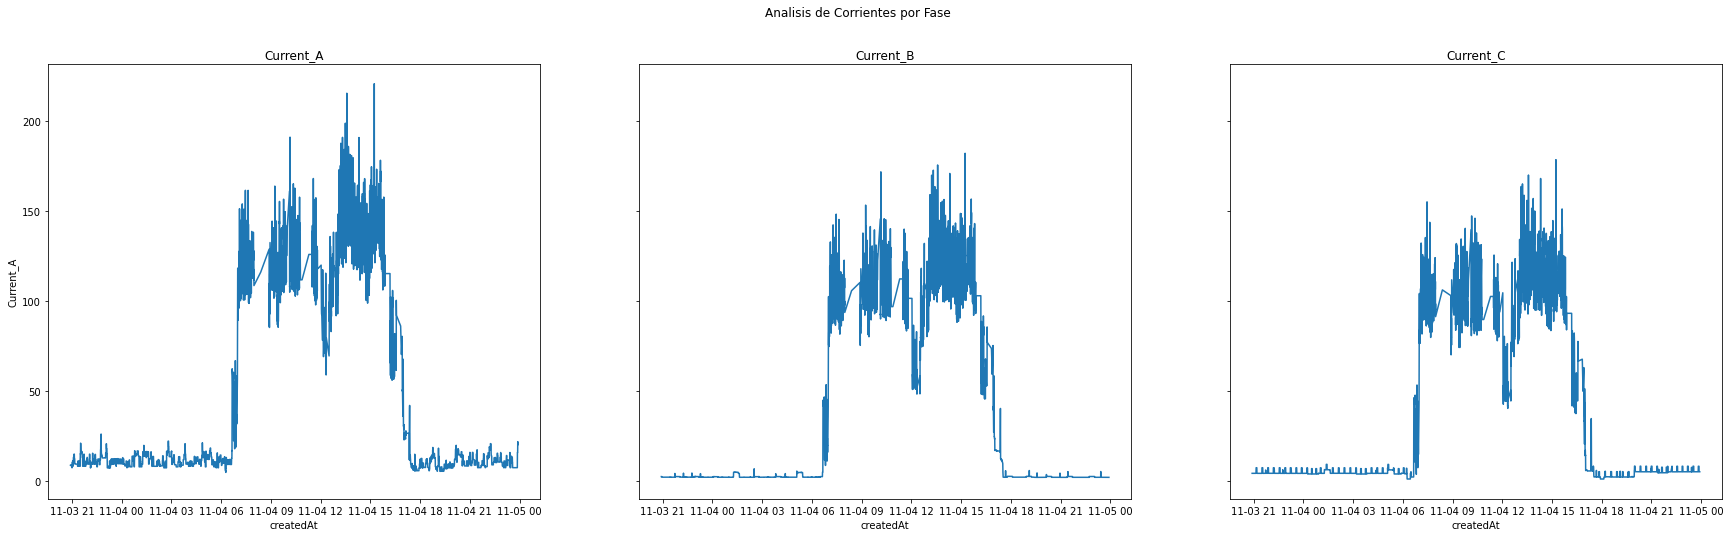

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,8), sharey=True)
fig.suptitle('Analisis de Corrientes por Fase')

seaborn.lineplot(data=df_1,  ax=axes[0], x=df_1.index, y="Current_A")
axes[0].set_title('Current_A')

seaborn.lineplot(data=df_1,  ax=axes[1], x=df_1.index, y="Current_B")
axes[1].set_title('Current_B')

seaborn.lineplot(data=df_1,  ax=axes[2], x=df_1.index, y="Current_C")
axes[2].set_title('Current_C')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(0.0, 200.0, 0.0, 0.10187733445525099)

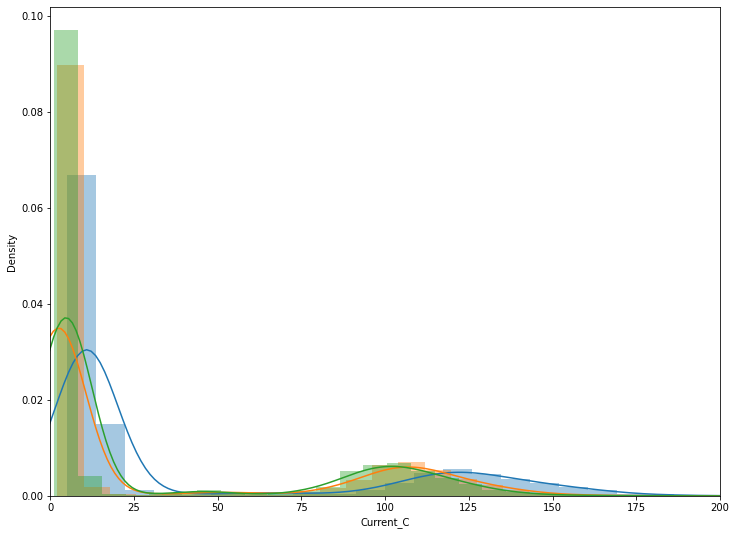

In [ ]:
f,ax=plt.subplots(figsize=(12, 9))
seaborn.distplot(df_1['Current_A']).axis(xmin=0,xmax=200)
seaborn.distplot(df_1['Current_B']).axis(xmin=0,xmax=200)
seaborn.distplot(df_1['Current_C']).axis(xmin=0,xmax=200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Current_C')

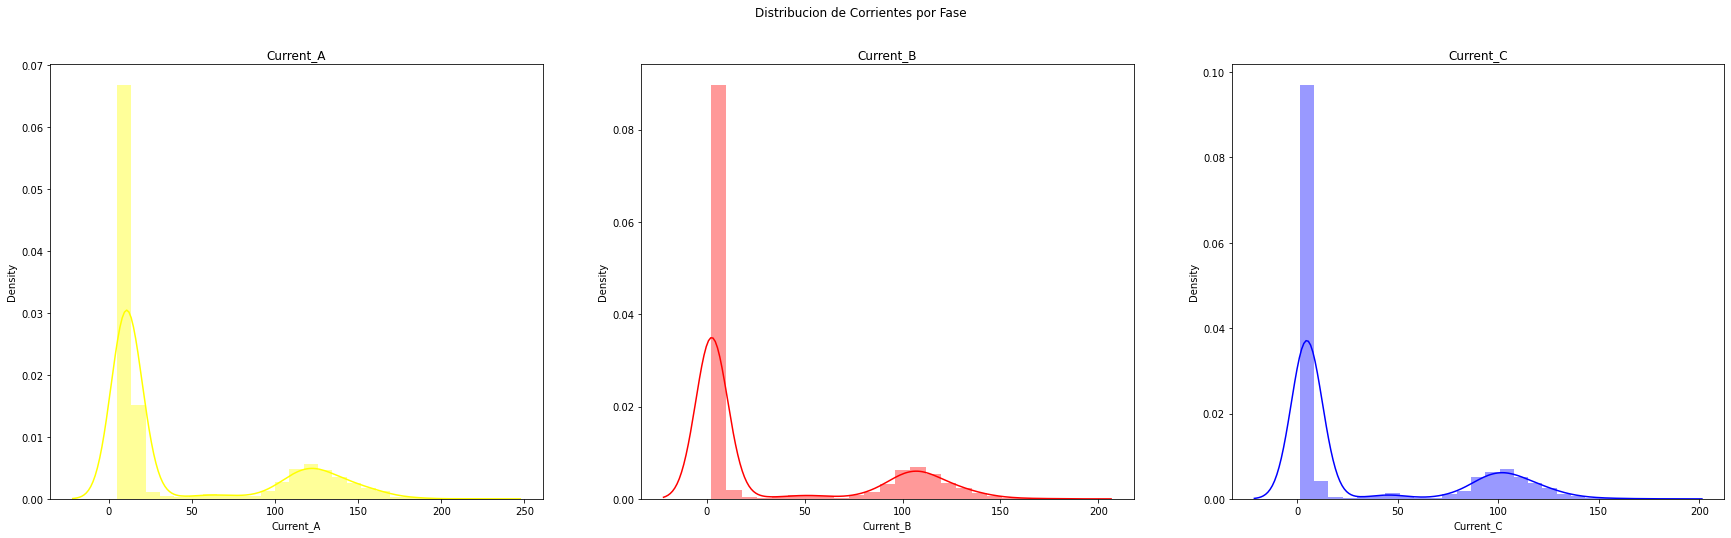

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,8))
fig.suptitle('Distribucion de Corrientes por Fase')

seaborn.distplot(df_1['Current_A'],ax=axes[0], color='yellow')
axes[0].set_title('Current_A')

seaborn.distplot(df_1['Current_B'],ax=axes[1],color='red')
axes[1].set_title('Current_B')

seaborn.distplot(df_1['Current_C'],ax=axes[2], color='blue')
axes[2].set_title('Current_C')

In [ ]:
df_1_currents_max = df_1_groupby_minute_max[['Current_A', 'Current_B', 'Current_C', 'Current_N']]
df_1_currents_max.head()

,Current_A,Current_B,Current_C,Current_N
createdAt,,,,
2020-11-03 20:54:00+00:00,8.86,2.57,4.38,5.06
2020-11-03 20:55:00+00:00,8.86,2.57,4.39,5.06
2020-11-03 20:56:00+00:00,8.83,2.57,4.38,5.54
2020-11-03 20:57:00+00:00,8.84,2.25,4.38,5.55
2020-11-03 20:58:00+00:00,8.84,2.26,4.40,5.56


In [ ]:
work_shift_filter = df_1_currents_max.loc[(df_1_currents_max.index.hour > 6)
                                                         & (df_1_currents_max.index.hour < 18)]
work_shift_filter

,Current_A,Current_B,Current_C,Current_N
createdAt,,,,
2020-11-04 07:00:00+00:00,118.43,102.63,104.36,20.53
2020-11-04 07:01:00+00:00,106.18,90.42,90.91,21.24
2020-11-04 07:02:00+00:00,115.51,99.54,98.60,23.97
2020-11-04 07:03:00+00:00,111.44,94.16,99.85,21.84
2020-11-04 07:04:00+00:00,127.74,119.42,107.03,21.16
...,...,...,...,...
2020-11-04 17:55:00+00:00,5.84,2.72,1.23,4.59
2020-11-04 17:56:00+00:00,7.34,2.70,1.25,6.06
2020-11-04 17:57:00+00:00,7.32,2.70,1.25,6.05


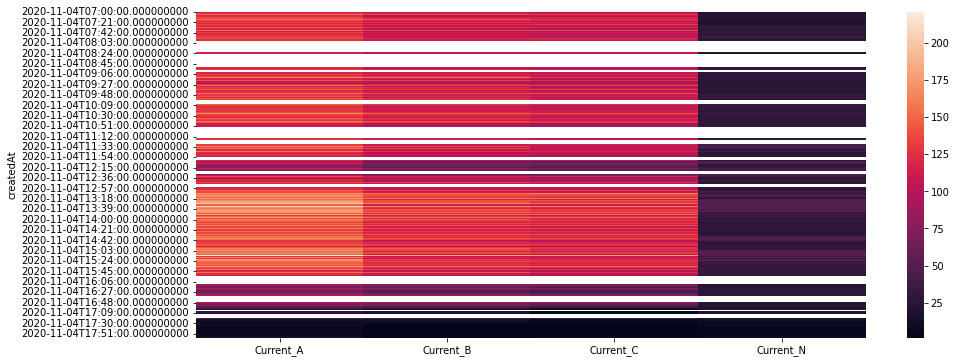

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = seaborn.heatmap(work_shift_filter)

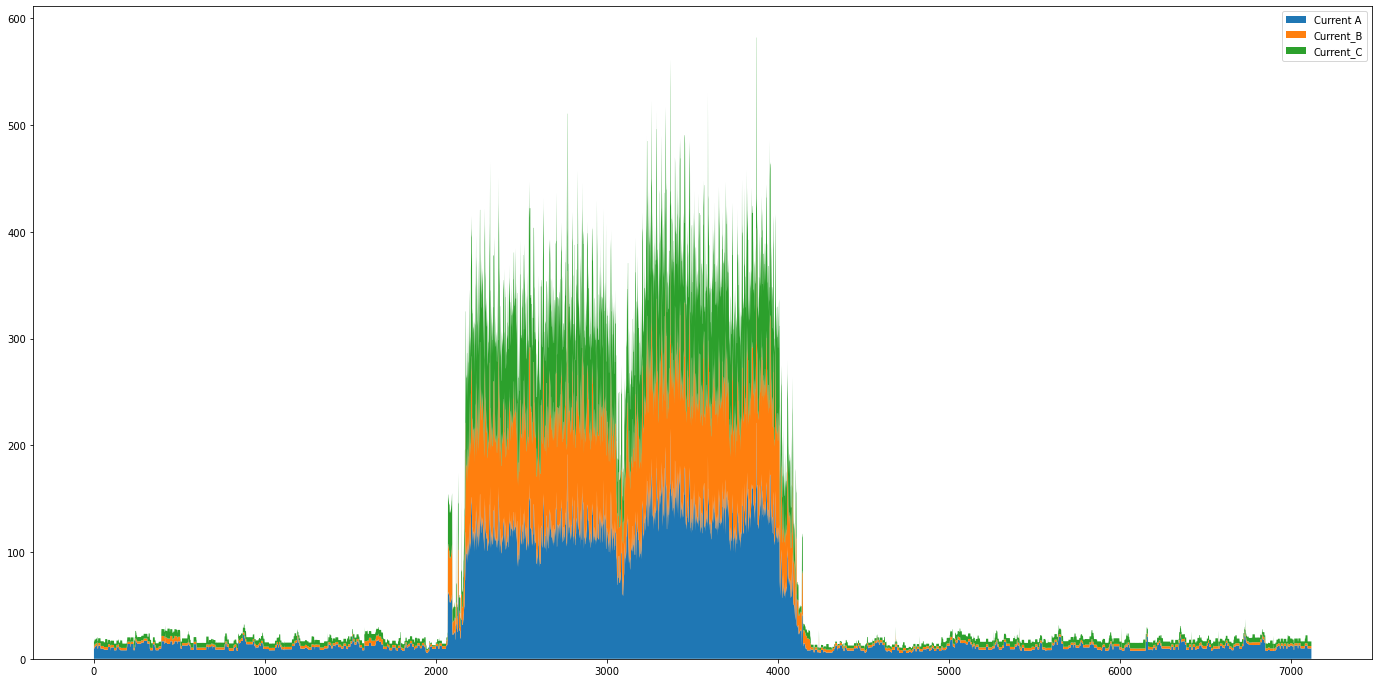

In [ ]:
#library
import numpy as np
import matplotlib.pyplot as plt
#df_2 = pandas.read_csv(url1)
plt.figure(figsize=(24, 12))
# Create data
#x=range(1,200)
x=df_2.index
y1=df_2['Current_A']
y2=df_2['Current_B']
y3=df_2['Current_C']

# Basic stacked area chart.
plt.stackplot(x, y1, y2, y3,  labels=['Current A','Current_B','Current_C'])
plt.legend(loc='upper right')


En el grafico anterior podemos ver que en los horarios de menor consumo la mayor corriente es la corriente A, por lo que se podria inferir que el sistema luminico de la empresa se alimenta con esta fase

# Análisis de consumo de Energia

La energia consumida es otra de las variables a tener en cuenta en la tarifa electrica. Se debe tener en cuenta los maximos consumidos mensualmente para definir valor contratado

In [ ]:
relevant_cols = ['Active_Energy_Delivered','Active_Energy_Received',  'Reactive_Energy_Delivered','Reactive_Energy_Received', 'Apparent_Energy_Delivered','Apparent_Energy_Received']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
df_3 = df_1[relevant_cols]

<Figure size 1728x864 with 0 Axes>

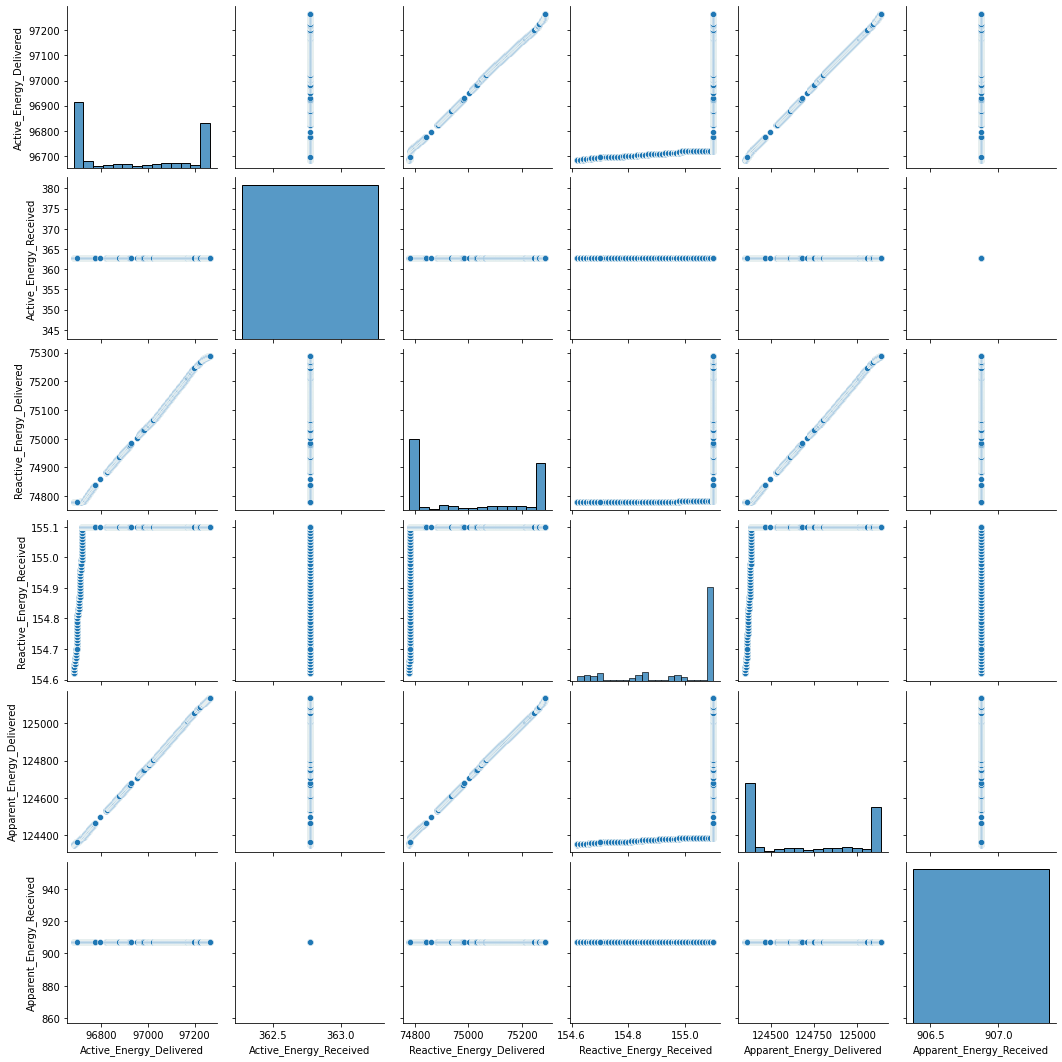

In [ ]:
plt.figure(figsize=(24, 12))
seaborn.pairplot(data= df_3)

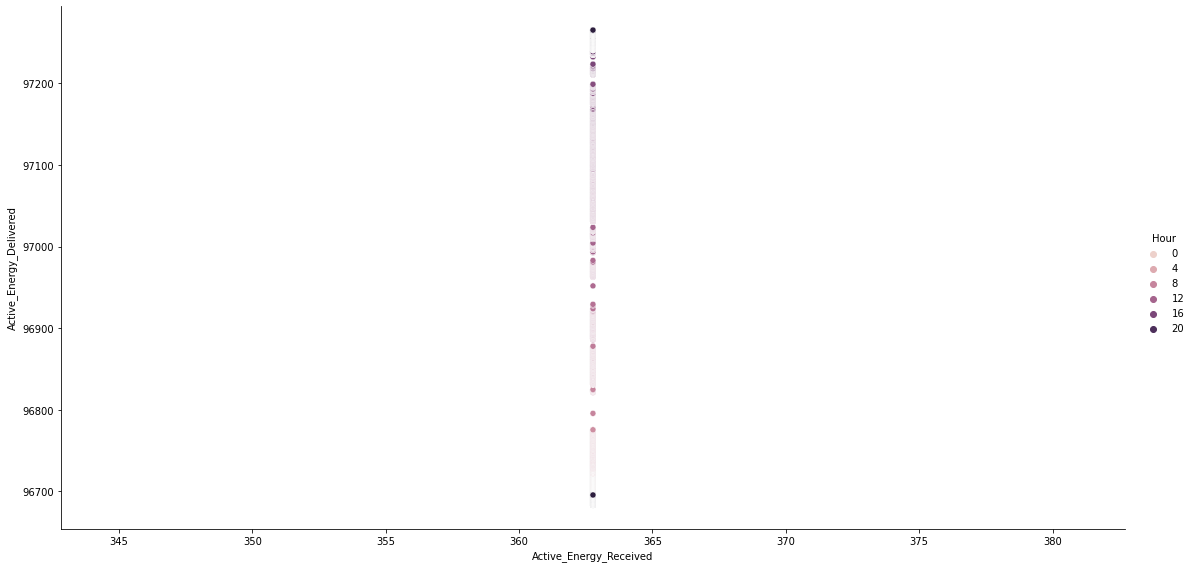

In [ ]:
seaborn.pairplot(data=df_1, y_vars=['Active_Energy_Delivered'],
                 x_vars=['Active_Energy_Received'],hue='Hour',
                 aspect=2, height=8)

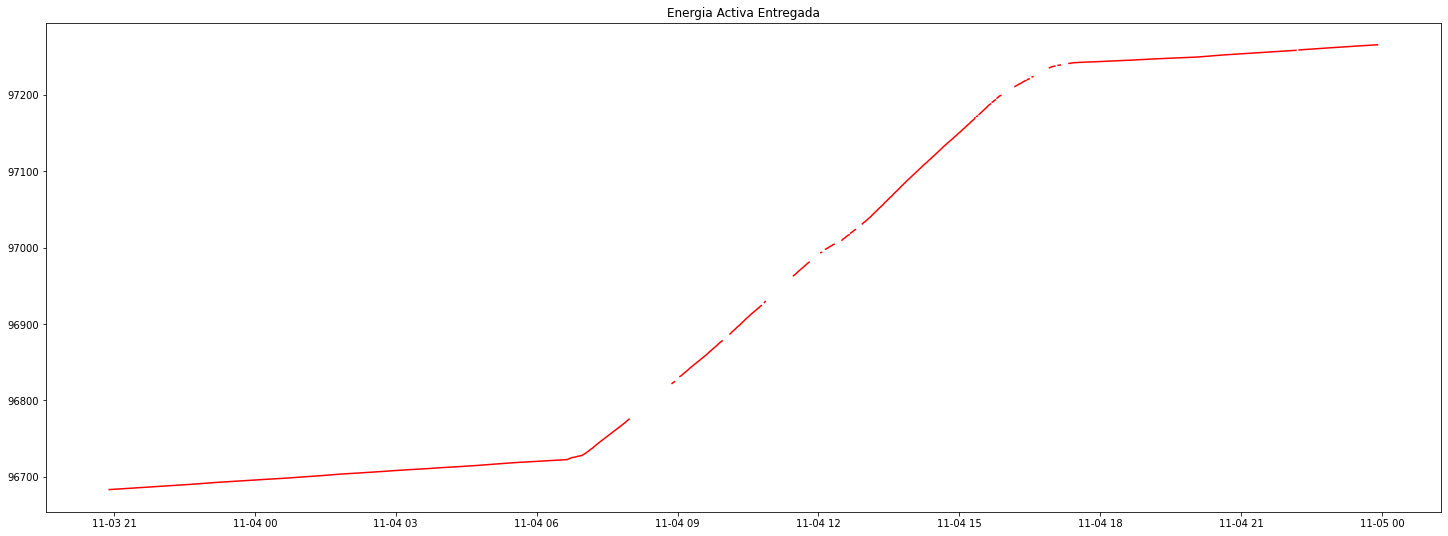

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 9))
ax1.plot( df_1_groupby_minute_mean["Active_Energy_Delivered"], color="red")
ax1.set(title='Energia Activa Entregada')
#ax1.plot( df_1_groupby_minute_mean["Active_Energy_Received"],  color="yellow")
#ax1.plot(df_industrial_groupby_minute_mean["Apparent_Energy_Total"], color="steelblue")
#ax1.plot(df_industrial_groupby_minute_mean["Reactive_Power_Total"], "black")
plt.show()

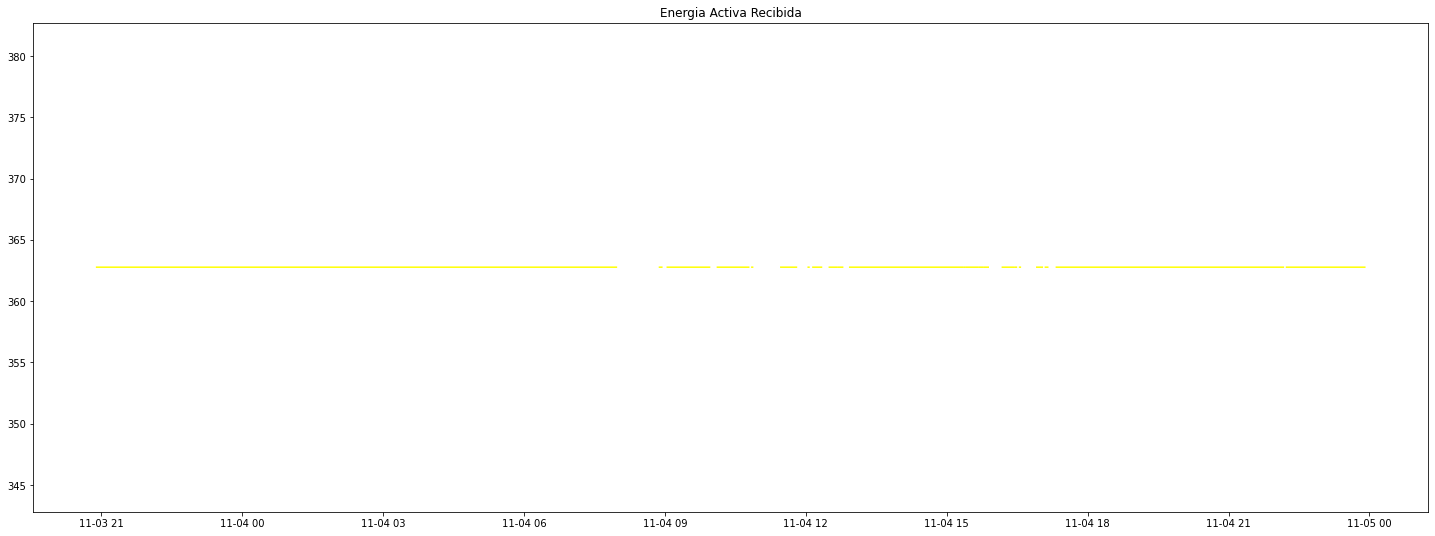

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 9))
#ax1.plot( df_1_groupby_minute_mean["Active_Energy_Delivered"], color="red")
ax1.plot( df_1_groupby_minute_mean["Active_Energy_Received"],  color="yellow")
ax1.set(title='Energia Activa Recibida')
#ax1.plot(df_industrial_groupby_minute_mean["Apparent_Energy_Total"], color="steelblue")
#ax1.plot(df_industrial_groupby_minute_mean["Reactive_Power_Total"], "black")
plt.show()

De los graficos anteriores podemos inferir que mientras que la energia recibida se mantiene constante en el tiempo, la energia entregada aumenta con el tiempo y es la que denotara el consumo

# Análisis de la Temperatura

Si bien la tempreratura esta medida dentro del dispositivo, podemos estimar la temperatura del ambiente en base a esta columna, como para estimar cargas puntuales durante de la epoca de verano debido a la utilización de aires acondicinados. 
Un dato importante a relevar es el tipo de calefacción durante la temporatada invernal. Si los mismos equipos de Aire Acondicionado son Frio/Calor, podemos pensar a estas cargas como estivales y constantes durante invierno y verano. Si son solo para tratamiento de aire en verano, deberemos considerarlos como casos especiales y tratar de determinar su consumo particular a fines de evitar que impacten en el análisis de cargas de los equipos de producción. 
Un rápido análisis de los gráficos de los cargas por fase, hace estimar que estas cargas se encuentran sobre la fase A.

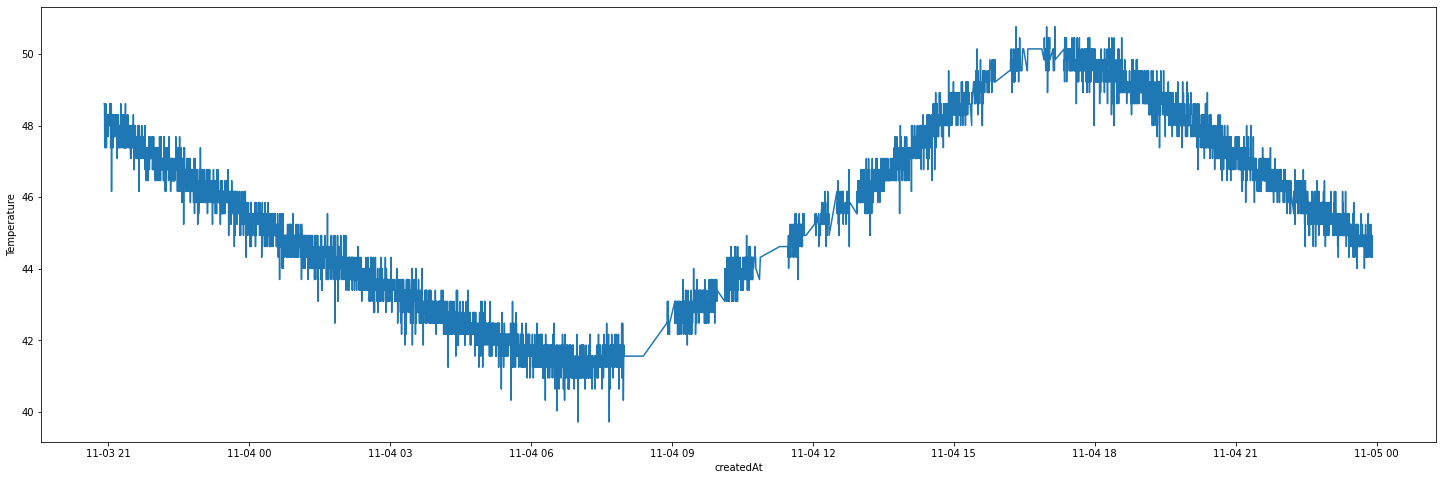

In [ ]:
fig = plt.figure(figsize=(25,8))
seaborn.lineplot(data=df_1, x=df_1.index, y="Temperature")

Buscamos relacionar la Potencia Activa con la Temperatura para tratar de determinar consumos particulares según los picos de temperatura

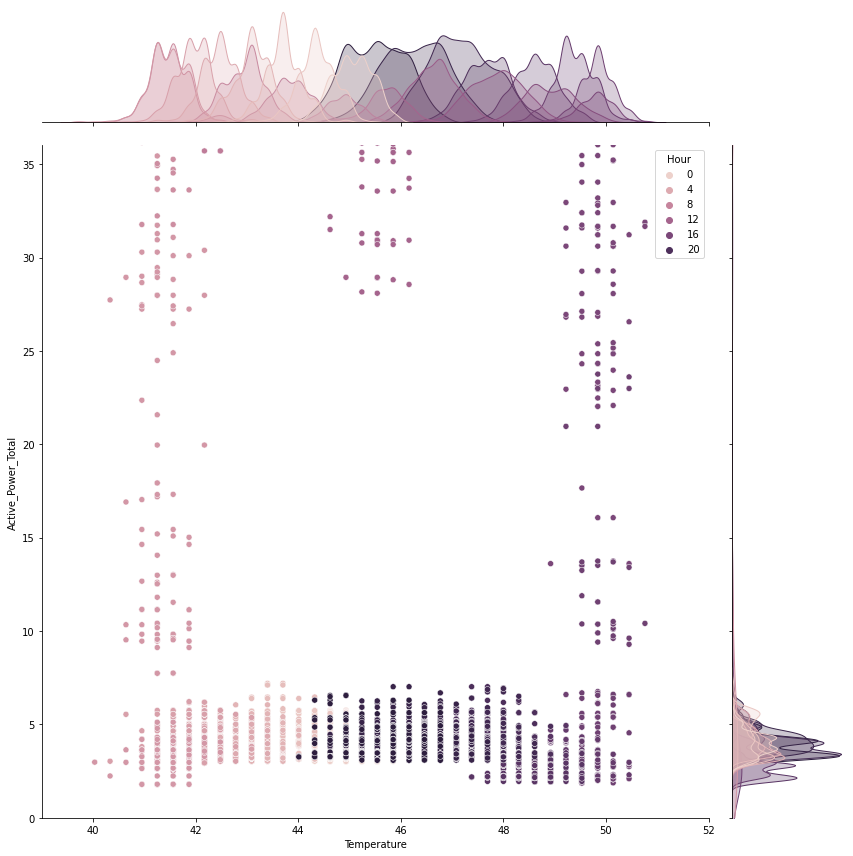

In [ ]:
plot = seaborn.jointplot(data = df_1 , x = 'Temperature', y = 'Active_Power_Total', hue='Hour', height=12)
plot.ax_marg_x.set_xlim(39, 52)
plot.ax_marg_y.set_ylim(0, 36)
plt.show()

A continuacion las temperaturas para cada una de las corrientes para observar si se tiene el mismo comportamiento

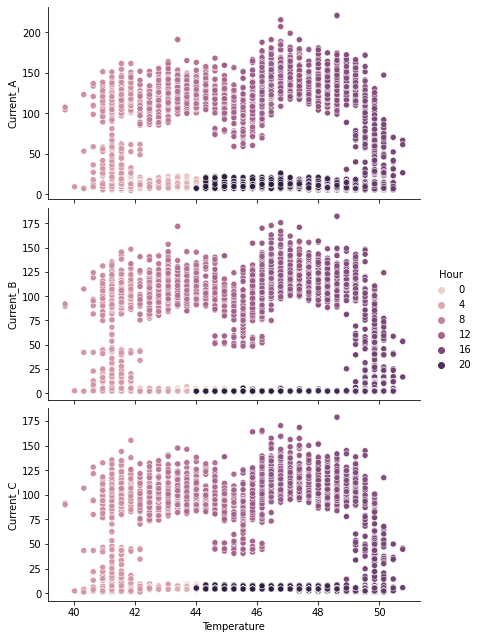

In [ ]:
seaborn.pairplot(data=df_1, y_vars=['Current_A',"Current_B","Current_C"],
                 x_vars=['Temperature'],hue='Hour',
                 aspect=2, height=3)




#Matriz de correlación




In [ ]:
cormat = df_2.corr()
cormat

NameError: ignored

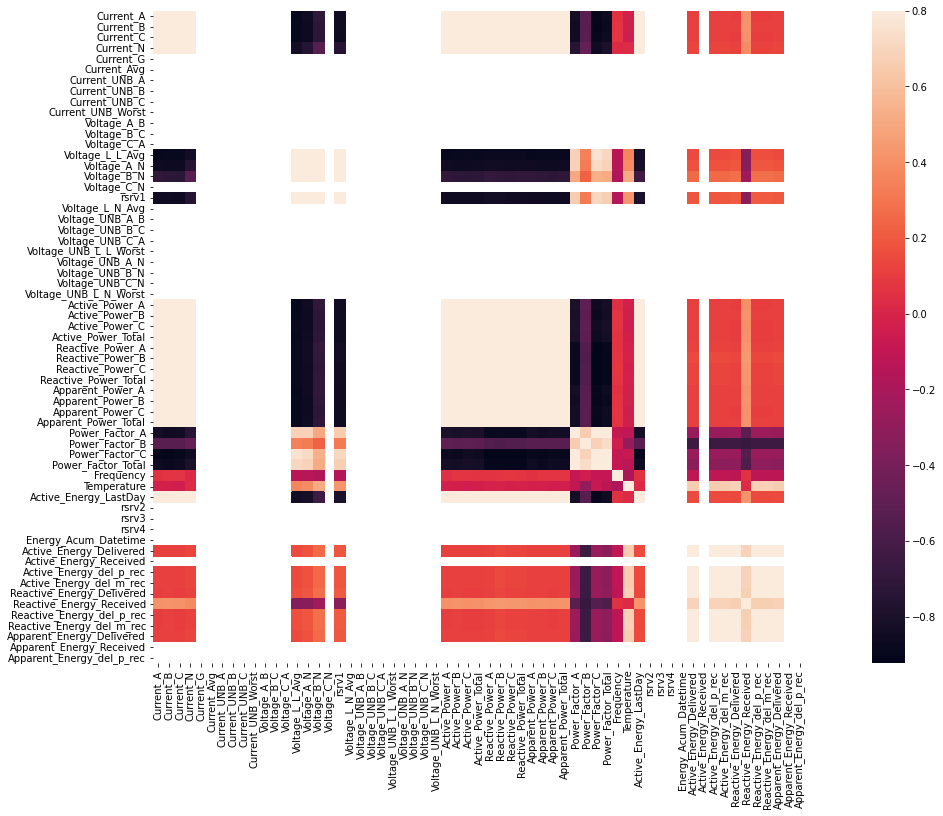

In [ ]:
plt.figure(figsize=(24, 12))
seaborn.heatmap(cormat, vmax=0.8, square=True)

# Conclusiones primer Entregable

  Luego de la primer interacción con los datos, pudimos observar algunas columnas que presentan datos que consideramos irrelevantes.
  Algunos valores de factor de potencia que requiren mayor análisis antes de ser desechados como Outliers, se requiere más información sobre el tipo y funcionamiento del banco de capacitores para determinar como corrigen el factor de potencia.
Las curvas de corrientes poseen un pequeno desbalance que debemos indagar a que se debe.
- Cómo afecta la perdida de comunicación del dispositivo a nuestro análisis o estimación de multas en función de un Factor de Potencia menos a 0.95?
- Para un futuro deberíamos relacionar las lecturas mensuales de la factura de EPEC con nuestros datos, a fin de utilizar períodos similares a los de la lectura de proveedora.
- Existe algún objetivo particular del análisis que la industria quiere obtener? 